In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
%matplotlib inline

### Question (1): (10pt)

Suppose that the independent variable $x$ has n observations: $(x_1,x_2,...x_n)$ and the dependent variable $y$ has corresponding observations: $(y_1, y_2,...,y_n)$. If the correlation between these two sequences $corr(x,y)=0.02$, which of the following statements are true? Please select all the right answers.

(a) There should be no strong relation between $x$ and $y$.

(b) If we build a linear regression between $y$ and $x$ as $y=wx$, we could conclude that the OLS estimation for $w$ should be around 0.02.

(c) There could be some strong linear relationship between $x$ and $y$.

(d) Certain relation between $x$ and $y$ could still exist, but it should be non-linear.

### Ans: (d) 
### corr(x,y) indicates the quality of linear fit of the model. A low value for corr(x,y) indicates that the model is not a linear fit. But this low value does not eliminate the possibility of a non-linear relationships. Thus, there can be a certain relation between x and y but it should be non-linear.

### Question (2): (10pt)

Consider a model

$y=x^{b}$ where $b>0$. 

Now, suppose x triples (originally $x>0$). How would y change with respect to this change of x? Let us denote new $y$ as $y'$. Please select all the right answers from below. 

(a) $y'<3y$ if b is less than one.

(b) $y'=3y$ in any case.

(c) $y'$ increases by $(2^b-1)*100\%$.

(d) $y'>3y$ if b is bigger than one.

### Ans: (a) $y'<3y$ if b is less than one.
### (d) $y'>3y$ if b is bigger than one.

### Question (3): (30 pt)


In [2]:
x=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [3]:
y=[14.0, 12.0, 18.0, -4.0, 14.0, 35.0, 45.0, 30.0, 50.0, 54.0, 58.0, 
   55.0, 57.0, 62.0, 61.0, 83.0, 85.0, 106.0, 105.0, 104.0]

In [46]:
#Loading data in a dataframe for simplicity of calculations
regressionDf=pd.DataFrame([x,y]).T
regressionDf.columns=["x","y"]
regressionDf.head()

,x,y
0,0.0,14.0
1,1.0,12.0
2,2.0,18.0
3,3.0,-4.0
4,4.0,14.0


#### (a) Calculate corr(x,y) without using a build-in function for the correlation coefficient.

In [47]:
numerator = ((regressionDf.x-regressionDf.x.mean())*(regressionDf.y-regressionDf.y.mean())).sum()
denominator = (((regressionDf.x-regressionDf.x.mean())**2).sum()*((regressionDf.y-regressionDf.y.mean())**2).sum())**0.5
corr_coeff = numerator/denominator
print("corr(x,y) : %s"%(corr_coeff))

corr(x,y) : 0.956301005112


#### (b) Estimate linear model $y=w_1*x+w_0$ using OLS formulas and without using build-in functions for the linear regression. What is  $w_1$ and $w_0$? What is $R^2$?

In [48]:
regressionDf.loc[:,"x_sqr"]=regressionDf.x*regressionDf.x
regressionDf.loc[:,"xy"]=regressionDf.x*regressionDf.y
regressionDf.head()

,x,y,x_sqr,xy
0,0.0,14.0,0.0,0.0
1,1.0,12.0,1.0,12.0
2,2.0,18.0,4.0,36.0
3,3.0,-4.0,9.0,-12.0
4,4.0,14.0,16.0,56.0


In [15]:
#Calculating coefficients w1 and w0
w1_numerator = (regressionDf.xy.sum()-regressionDf.y.sum()*regressionDf.x.sum()/len(regressionDf))
w1_denominator = (regressionDf.x_sqr.sum()-regressionDf.x.sum()*regressionDf.x.sum()/len(regressionDf))
w1 = w1_numerator/w1_denominator

w0 = (regressionDf.y-regressionDf.x*w1).mean()
print("w0 = %s, w1 = %s"%(w0, w1))

#Calculating R^2
regressionDf.loc[:,"y_pred"]=w1*regressionDf.x+w0 #Calculating predicted value of y from fitted model
regressionDf.loc[:,"error"]=regressionDf.y-regressionDf.y_pred #Calculating difference between actual and predicted value
coeff_determination = 1-(regressionDf.error**2).sum()/((regressionDf.y-regressionDf.y.mean())**2).sum() #Calculating R^2
print("Coefficient of determination (R^2) : %s"%(coeff_determination))

w0 = 1.95714285714, w1 = 5.28872180451
Coefficient of determination (R^2) : 0.914511612377


#### (c) Use regression function to double check your answer making sure that your calculation is correct. 

In [16]:
lm = smf.ols(formula='y ~ x', data = regressionDf).fit()
print("w0 = %s and w1 = %s"%(lm.params[0], lm.params[1]))
print("Coefficient of determination (R^2) : %s"%lm.rsquared)

w0 = 1.95714285714 and w1 = 5.28872180451
Coefficient of determination (R^2) : 0.914511612377


### Question (4): (30pt) 

For the data below estimate a model: AssessTot = w* LotArea (with and without intercept)

LotArea: Total area of the tax lot

AssessTot: The actual assessed total value of Final Year 2015

In [22]:
data_4=pd.read_csv("data/Housing_Pluto_Session2.csv")
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
3,NaN,31200,18326711
4,11201.0,16307,0


#### (a). As we see, this data set is not clean.  Drop all the rows which contain "NaN" and 0 terms.

In [23]:
data_4.dropna(inplace=True) 
data_4=data_4[(data_4.LotArea!=0) & (data_4.AssessTot!=0)]
data_4.head()

,ZipCode,LotArea,AssessTot
0,11201.0,126975,3922200
1,11201.0,52600,1359900
2,11201.0,17700,656100
5,11201.0,8120,5976000
6,11201.0,1297,56954


#### (b). Visualize the data set.

In [25]:
import seaborn as sns

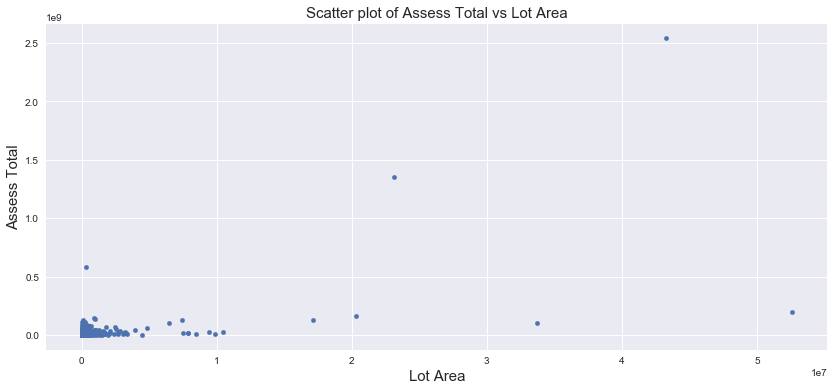

In [38]:
data_4.plot(kind='scatter',x='LotArea',y='AssessTot', figsize=(14,6))
plt.xlabel('Lot Area', size = 15)
plt.ylabel('Assess Total', size = 15)
plt.title('Scatter plot of Assess Total vs Lot Area', size = 15)

#### (c).  Build a model : AssessTot=$w_1$*LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  Plot your results together with observations. 

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.724e+05
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        12:53:58   Log-Likelihood:            -4.6214e+06
No. Observations:              275942   AIC:                         9.243e+06
Df Residuals:                  275940   BIC:                         9.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.687e+04   8649.652      8.887      0.0

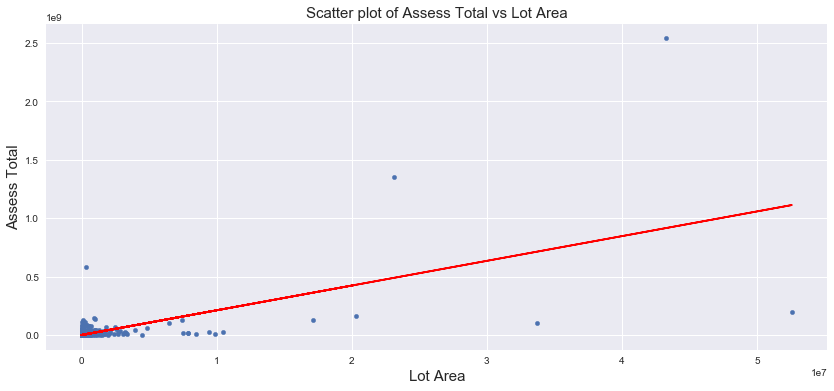

In [39]:
lm = smf.ols(formula='AssessTot ~ LotArea', data = data_4).fit()
print(lm.summary())
data_4.plot(kind='scatter',x='LotArea',y='AssessTot', figsize=(14,6))
plt.title('Scatter plot of Assess Total vs Lot Area',  size = 15)
plt.plot(data_4.LotArea,lm.predict(),'r-')
plt.xlabel('Lot Area', size = 15)
plt.ylabel('Assess Total', size = 15)

#### (d) Repeat (c) without intercept, i.e. with $w_2=0$.

                            OLS Regression Results                            
Dep. Variable:              AssessTot   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                 1.727e+05
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        12:59:32   Log-Likelihood:            -4.6214e+06
No. Observations:              275942   AIC:                         9.243e+06
Df Residuals:                  275941   BIC:                         9.243e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
LotArea       21.1740      0.051    415.561      0.0

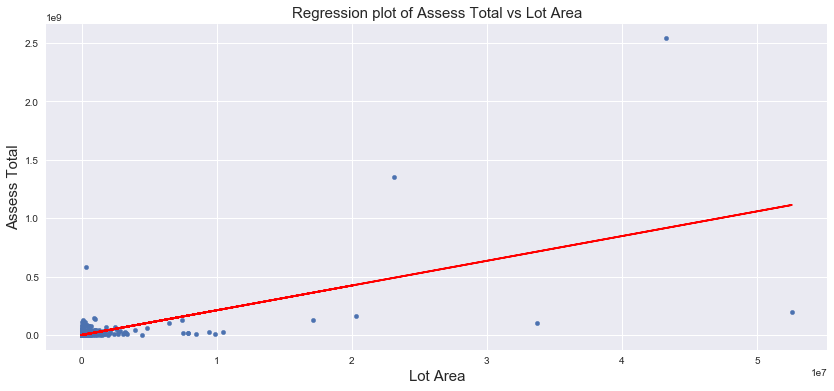

In [41]:
lm = smf.ols(formula='AssessTot ~ LotArea - 1', data = data_4).fit() #
print(lm.summary())
data_4.plot(kind='scatter',x='LotArea',y='AssessTot', figsize=(14,6))
plt.title('Regression plot of Assess Total vs Lot Area',  size = 15)
plt.plot(data_4.LotArea,lm.predict(),'r-')
plt.xlabel('Lot Area', size = 15)
plt.ylabel('Assess Total', size = 15)

### Observation: In above figure, since most of the points are concentrated at near the origin with few points with high values, we are unable to get a good linear fit. Perhaps regressing the data on a log scale might provide a better fit.

### Question (5): (20pt)

For the same data as above try the model: log_AssessTot=$w_1$*log_LotArea + $w_2$. Get $w_1$, $w_2$ and $R^2$.  And plot your results together with observations. Explain the result - what does the estimated "$w_1$" means to you?

                            OLS Regression Results                            
Dep. Variable:          log_AssessTot   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                 2.659e+05
Date:                Sat, 21 Oct 2017   Prob (F-statistic):               0.00
Time:                        13:07:26   Log-Likelihood:            -3.4454e+05
No. Observations:              275942   AIC:                         6.891e+05
Df Residuals:                  275940   BIC:                         6.891e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2088      0.020     10.345      

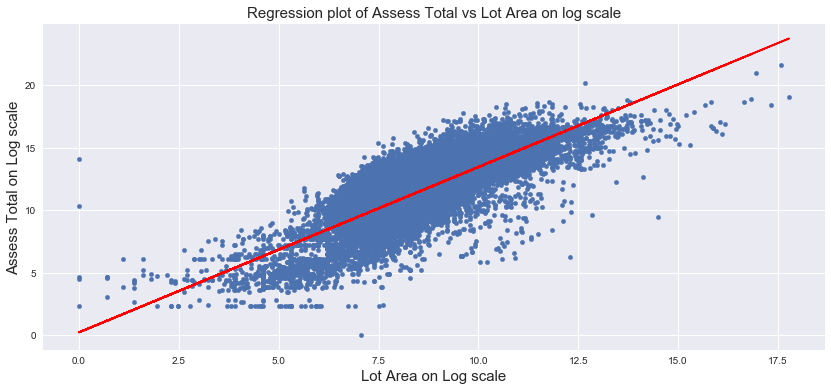

In [45]:
data_4.loc[:,"log_AssessTot"]=np.log(data_4.AssessTot)
data_4.loc[:,"log_LotArea"]=np.log(data_4.LotArea)
lm = smf.ols(formula='log_AssessTot ~ log_LotArea', data = data_4).fit()
print(lm.summary())
data_4.plot(kind='scatter',x='log_LotArea',y='log_AssessTot',  figsize=(14,6))
plt.plot(data_4.log_LotArea,lm.predict(),'r-')
plt.title('Regression plot of Assess Total vs Lot Area on log scale',  size = 15)
plt.xlabel('Lot Area on Log scale', size = 15)
plt.ylabel('Assess Total on Log scale', size = 15)

### The estimated w1 is this regression follows the equation y = ${c} x^{w1}$ where w1 = 1.325. This indicates that assess total increases superlinearly with respect to lot area. This means that a one percent increase in lot area is associated 1.3250 percent increase in  assess total.